# ECE6530 DSP Group 3 Project
# Lab P-9 Convolution, and FIR Filtering, Exercise 3.2
### Group Members: Grant Brown, Thomas Warren, Rick Lyon

In [1]:
# Load the required libraries
import matplotlib.pyplot as plt
import numpy as np
from filters import filter_2d
from scipy.io import loadmat, wavfile

np.set_printoptions(suppress=True, precision=2)
plt.rc("xtick", direction="inout", labelsize="x-small")
plt.rc("ytick", direction="inout", labelsize="x-small")


def stem_plot(
    ax: plt.Axes, xd, yd, color="teal", markersize=6, linestyle="solid", label=None
):
    """Create customized stem plot on axes with data (xd, yd)"""
    markerline, stemlines, baseline = ax.stem(xd, yd, label=label)
    plt.setp(stemlines, color=color, linestyle=linestyle)
    plt.setp(markerline, markersize=markersize, color=color)

%config InlineBackend.figure_formats = ['svg']

# 3.2 Cascading Two Systems
----

More complicated systems are often made up from simple building blocks. In the system of Fig. 3 two FIR filters are connected “in cascade.” 

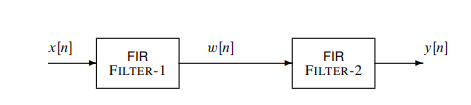

For this section, assume that the the filters in Fig. 3 are described by the two equations:

$$w[n] = x[n] - qx[n-1]$$
$$y[n] = \sum_{l=0}^{M} r^l w[n-l]$$



# 3.2.1 Overall Impulse Response
-------

# (a) 

Implement the system in Fig. 3 using MATLAB to get the impulse response of the overall cascaded system for the case where q = 0.9, r = 0.9 and M = 22. Use two calls to `firfilt()`. Plot the impulse response of the overall cascaded system.

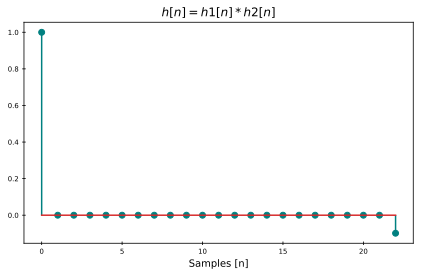

In [2]:
#Create total impulse response and graph it
q = 0.9
r = 0.9
M = 22
#Filter 1
h1_n = np.array([1, -q])

#Filter 2
n = np.arange(M)
h2_n = r**n

hn = np.convolve(h2_n, h1_n)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
stem_plot(ax, np.arange(len(hn)), hn)
ax.set_title("$h[n] = h1[n] * h2[n]$")
ax.set_xlabel("Samples [n]");

# (b) 

Work out the impulse response h[n] of the cascaded system by hand to verify that your MATLAB result in part (a) is correct. (Hint: consult old Homework problems.)

To solve this we should note that convolution in time domain is multiplication in frequency domain,

$$W[z] = X[z](1-qz^{-1}) \longrightarrow H_1(z) = W[z] / X[z] = (1-qz^{-1})$$

$$Y[z] = W[z]R[z]$$ 

where,
$$Z^{-1}(R[z]) = r[n] = r^n(u[n] - u(n-22))$$

Taking the Z-transform of r[n] we get:
$$R[z] = \sum_{n=-\infty}^{\infty}(\dfrac{r}{z})^n u[n] - \sum_{n=-\infty}^{\infty}(\dfrac{r}{z})^n u[n-22]$$
$$R[z] = \sum_{n=0}^{\infty}(\dfrac{r}{z})^n - \sum_{n=22}^{\infty}(\dfrac{r}{z})^n$$
$$R[z] = \sum_{n=0}^{\infty}(\dfrac{r}{z})^n - r^{22} z^{-22} \sum_{n=0}^{\infty}(\dfrac{r}{z})^n$$
$$R[z] = \dfrac{1}{1-rz^{-1}} - \dfrac{r^{22} z^{-22}}{1-rz^{-1}}$$

The total system function of the cascaded system is:
$$H_{total}[z] = W[z] * R[z] = (1-qz^{-1})*(\dfrac{1}{1-rz^{-1}} - \dfrac{r^{22} z^{-22}}{1-rz^{-1}})$$
Since r=q in the instance we get:
$$H_{total}[z] = W[z] * R[z] = 1 + r^{22}z^{-22}$$
Taking the inverse Z-transform of this we get:
$$h_{total}[n] = \delta [n] + r^{22}\delta [n-22]$$
This is essentially a delta function with a negative scaled echo of the delta function. We see that M works as an attenuation factor here.

# (c) 

In a deconvolution application, the second system (FIR FILTER-2) tries to undo the convolution effect of the first. Perfect deconvolution would require that the cascade combination of the two systems be equivalent to the identity system: y[n] = x[n]. If the impulse responses of the two systems are $h_1[n]$ and $h_2[n]$, state the condition on $h_1[n]$ * $h_2[n]$ to achieve perfect deconvolution.

To implement perfect deconvolution we should note that convolution of x[n] with an impulse just gives x[n] at the output. Therefore $h_1[n]$ * $h_2[n]$ = $\delta [n]$

# 3.2.2 Distorting and Restoring Images
------

If we pick q to be a little less than 1.0, then the first system (FIR FILTER-1) will cause distortion when applied to the rows and columns of an image. The objective in this section is to show that we can use the second system (FIR FILTER-2) to undo this distortion (more or less). Since FIR FILTER-2 will try to undo the convolutional effect of the first, it acts as a deconvolution operator.

# (a) 

Load in the image echart.mat with the load command. It creates a matrix called echart.
# (b) 

Pick q = 0.9 in FILTER-1 and filter the image echart in both directions: apply FILTER-1 along the horizontal direction and then filter the resulting image along the vertical direction also with FILTER-1. Call the result ech90.
# (c) 

Deconvolve ech90 with FIR FILTER-2, choosing M = 22 and r = 0.9. Describe the visual appearance of the output, and explain its features by invoking your mathematical understanding of the cascade filtering process. Explain why you see “ghosts” in the output image, and use some previous calculations to determine how big the ghosts (or echoes) are, and where they are located. Evaluate the worst-case error in order to say how big the ghosts are relative to “black-white” transitions which are 0 to 255.

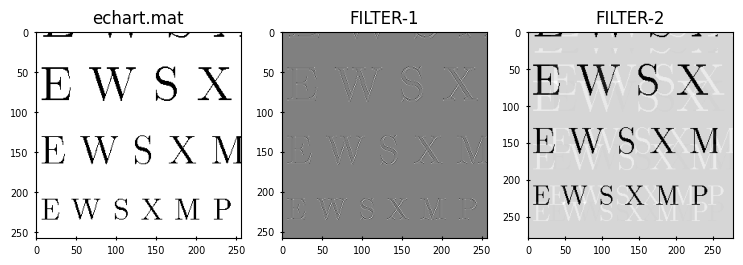

In [3]:
%config InlineBackend.figure_formats = ['png']
# create impulse response for FILTER-1
q = 0.9
r = 0.9
M = 22
h1_n = np.array([1, -q])

# create impulse response for FILTER-2
n = np.arange(M)
h2_n = r**n

# load image file
echart = loadmat("data/echart.mat")["echart"]

# normalize so image max is 1
echart = 1 - (echart / 255)

# apply FILTER-1 to image in both horizontal and vertical directions
ech90 = filter_2d(echart, h1_n)
# undo the effects of FILTER 1 by applying the deconvolutional filter to the result
ech90_decv = filter_2d(ech90, h2_n)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 5))
ax1.imshow(echart, cmap="binary")
ax1.set_title("echart.mat")
ax1.grid(False)

ax1.imshow(echart, cmap="binary")
ax1.set_title("echart.mat")
ax1.grid(False)

ax2.imshow(ech90, cmap="binary")
ax2.set_title("FILTER-1")
ax2.grid(False)

ax3.imshow(ech90_decv, cmap="binary")
ax3.set_title("FILTER-2")
ax3.grid(False)

plt.show()

Ghosts are seen in the output image due to an imperfect deconvolution. The convolution of the first filter was done in the horizontal and vertical directions. The restoration filter removed nearly all of the effect of the first filter, but there is a small negative "echo" that is seen that was not removed with the deconvolution filter. This "echo" that is left is 0.1 times the size of the original value and will be M = 22 samples delayed over.

In [4]:
# subtract the result of FILTER 2 from the original image. Images must be the same size for the comparison to work,
# so drop the last M-1 pixels from the deconvolved image
ech90_decnewshp = ech90_decv[0:-22, 0:-22]
im_error = np.abs(ech90_decnewshp - echart)
max_error = np.max(im_error)
print("For a scale of 0-255:")
print(f"Maximum Error found is {256*max_error}")

For a scale of 0-255:
Maximum Error found is 50.42027019180097


The worst case error for values up to 0-255 is 50.42

# 3.2.3 A Second Restoration Experiment
-----------

# (a) 

Now try to deconvolve ech90 with several different FIR filters for FILTER-2. You should set r = 0.9 and try several values for M such as 11, 22 and 33. Pick the best result and explain why it is the best. Describe the visual appearance of the output, and explain its features by invoking your mathematical understanding of the cascade filtering process. HINT: determine the impulse response of the cascaded system and relate it to the visual appearance of the output image.

As seen below, the best result is the version with M = 33. This result is the best because the filter order has been increased to 33. This increased filter order allows the value of r to increase and thus the effect of the impulse response from the first difference filter is lessened. The small amount of distortion ("echo") that remains is moved further away from the desired signal as well. As seen in the overall impulse response, there is a small negative distortion/echo that remains on the signal. As the value of M increases, this distortion decreases and moves away from the original signal.

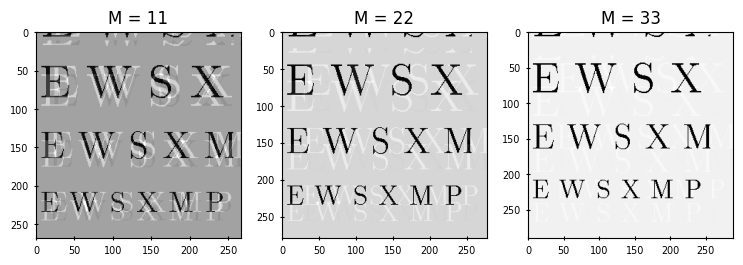

In [5]:
# create impulse responses for filters with M= 11, 22, and 33
M0 = 11
M1 = 22
M2 = 33

h2_n0 = r ** np.arange(M0)
h2_n1 = r ** np.arange(M1)
h2_n2 = r ** np.arange(M2)

# apply each filter to the FILTER-1 result
ech90_decv0 = filter_2d(ech90, h2_n0)
ech90_decv1 = filter_2d(ech90, h2_n1)
ech90_decv2 = filter_2d(ech90, h2_n2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 6))
ax1.imshow(ech90_decv0, cmap="binary")
ax1.set_title("M = 11")

ax2.imshow(ech90_decv1, cmap="binary")
ax2.set_title("M = 22")

ax3.imshow(ech90_decv2, cmap="binary")
ax3.set_title("M = 33")

for ax in (ax1, ax2, ax3):
    ax.grid(False)

# (b) 

Furthermore, when you consider that a gray-scale display has 256 levels, how large is the worst-case error (from the previous part) in terms of number of gray levels? Do this calculation for each of the three filters in part (a). Think about the following question: “Can your eyes perceive a gray scale change of one level, i.e., one part in 256?”


In [6]:
# subtract each filter result from the original image
# We also crop so the images are the same size
# Crop removes the rightmost pixels generated from convoution
ech90_decnewshp0 = ech90_decv0[0:-M0, 0:-M0]
ech90_decnewshp1 = ech90_decv1[0:-M1, 0:-M1]
ech90_decnewshp2 = ech90_decv2[0:-M2, 0:-M2]

im_error1 = np.abs(ech90_decnewshp0 - echart)
im_error2 = np.abs(ech90_decnewshp1 - echart)
im_error3 = np.abs(ech90_decnewshp2 - echart)

max_error1 = np.max(im_error1)
max_error2 = np.max(im_error2)
max_error3 = np.max(im_error3)

print("For a scale of 256:")
print(f"Maximum Error found is {256*max_error1}")
print(f"Maximum Error found is {256*max_error2}")
print(f"Maximum Error found is {256*max_error3}")

For a scale of 256:
Maximum Error found is 160.67102519808012
Maximum Error found is 50.42027019180097
Maximum Error found is 15.822415043907938


The maximum error for M=11 is 160.67, M=22 is 50.42 and M=33 is 15.82.
It would be difficult for our eyes to perceive this change. With an error value of ~16, the distortion is nearly imperceivable. If this error value were to approach one part in 256, the distortion would not be visible to the human eye. 

In [7]:
from IPython.display import display, HTML
from ipylab import JupyterFrontEnd
import subprocess

app = JupyterFrontEnd()

display(
    HTML(
        "<style>"
        ".jp-Cell { overflow-x: visible; overflow: visible; "
        "width: 95%; max-width: 960px; "
        "margin-left: auto; margin-right: auto; }"
        "img {"
        "width: 90%;"
        "height: 100%;}"
        ".jp-Cell-inputWrapper { width: 95%; overflow-x: visible; overflow: visible;}"
        "</style>"
    )
)

app.commands.execute("docmanager:save")
subprocess.run("jupyter nbconvert --to html main.ipynb", shell=True)
app.commands.execute("docmanager:save");